In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 

In [53]:
df = pd.read_excel("[Days 5].superstore_sales.xlsx")
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


Get the number of rows and columns


In [54]:
df.shape

(51290, 21)

Count the number of missing values

In [55]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

Question 1 : Which are the most selling products ?

In [56]:
Q1 = df.groupby('product_name').agg({'quantity':'sum'}).sort_values(by='quantity',ascending= False)[:10]
Q1

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14368\556134484.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= Q1.reset_index(),x='product_name',y='quantity',palette='rainbow')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Cardinal Index Tab, Clear'),
  Text(2, 0, 'Eldon File Cart, Single Width'),
  Text(3, 0, 'Rogers File Cart, Single Width'),
  Text(4, 0, 'Sanford Pencil Sharpener, Water Color'),
  Text(5, 0, 'Stockwell Paper Clips, Assorted Sizes'),
  Text(6, 0, 'Avery Index Tab, Clear'),
  Text(7, 0, 'Ibico Index Tab, Clear'),
  Text(8, 0, 'Smead File Cart, Single Width'),
  Text(9, 0, 'Stanley Pencil Sharpener, Water Color')])

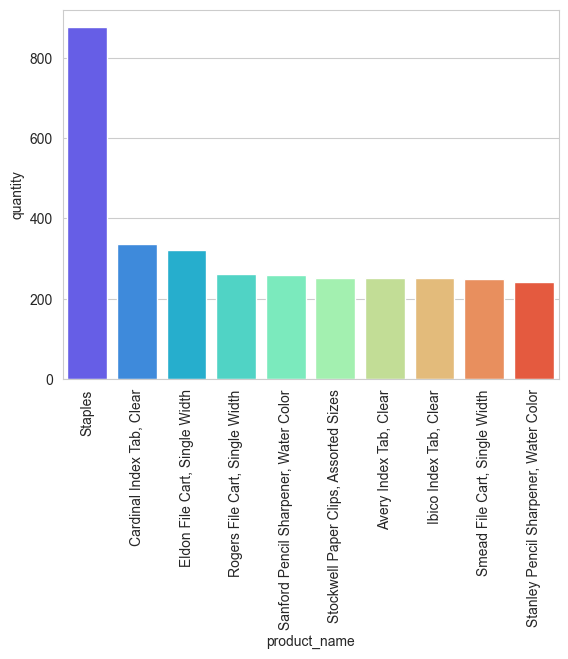

In [57]:
sns.barplot(data= Q1.reset_index(),x='product_name',y='quantity',palette='rainbow')
plt.xticks(rotation = 'vertical')

Question 2 : Which are top 10 product by sales ?

In [58]:
Q2 = df.groupby('product_name').agg({'sales':'sum'}).sort_values('sales',ascending=False)[:10]
Q2

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14368\3119457678.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Q2.reset_index(),x='product_name',y='sales',palette='rainbow')


Text(0.5, 1.0, 'Top 10 product by sales')

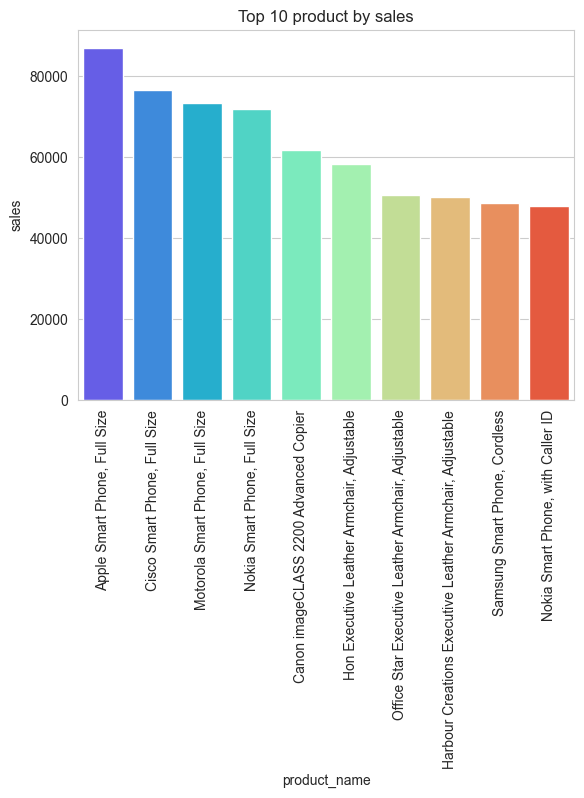

In [59]:
sns.barplot(data=Q2.reset_index(),x='product_name',y='sales',palette='rainbow')
plt.xticks(rotation = 'vertical')
plt.title("Top 10 product by sales")

In [60]:
Q3 = df.groupby('product_name').agg({'profit':'sum'}).sort_values('profit',ascending=False)
Q3

,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730
...,...
"Bevis Round Table, Adjustable Height",-3649.8940
Cubify CubeX 3D Printer Triple Head Print,-3839.9904
"Motorola Smart Phone, Cordless",-4447.0380


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Cisco Smart Phone, Full Size'),
  Text(2, 0, 'Motorola Smart Phone, Full Size'),
  Text(3, 0, 'Hoover Stove, Red'),
  Text(4, 0, 'Sauder Classic Bookcase, Traditional'),
  Text(5, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(6, 0, 'Nokia Smart Phone, Full Size'),
  Text(7, 0, 'Cisco Smart Phone, with Caller ID'),
  Text(8, 0, 'Nokia Smart Phone, with Caller ID'),
  Text(9, 0, 'Belkin Router, USB')])

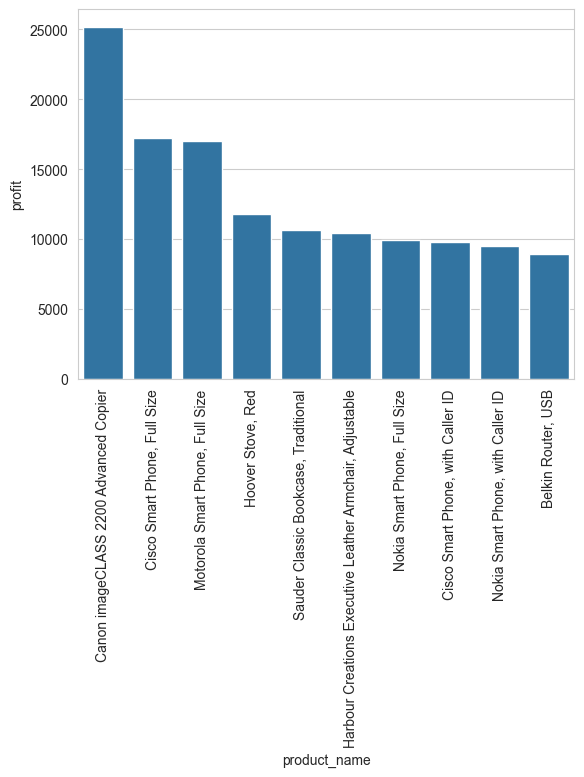

In [61]:
sns.barplot(data = Q3.head(10).reset_index(),x='product_name',y='profit')
plt.xticks(rotation = 'vertical')

Question 4 : What catagory sold the most ?

In [62]:
Q4 = df.groupby(['category']).agg({'quantity':'sum'}).sort_values('quantity',ascending=False).reset_index()
Q4

,category,quantity
0,Office Supplies,108182
1,Technology,35176
2,Furniture,34954


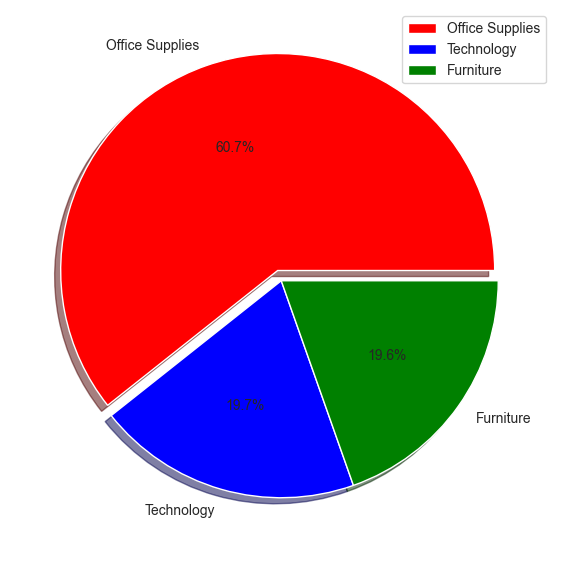

In [63]:
plt.figure(figsize=(7,9))
plt.pie(Q4['quantity'],labels=Q4['category'],shadow=True,explode=[0.05,0,0],colors = ['red', 'blue', 'green'],autopct = '%1.1f%%')
plt.legend()


Question 5 : Which are profitable category ?


In [64]:
Q5 = df.groupby('category').agg({'profit':'sum'}).sort_values('profit',ascending=False).reset_index()
Q5

,category,profit
0,Technology,663778.73318
1,Office Supplies,518473.83430
2,Furniture,286782.25380


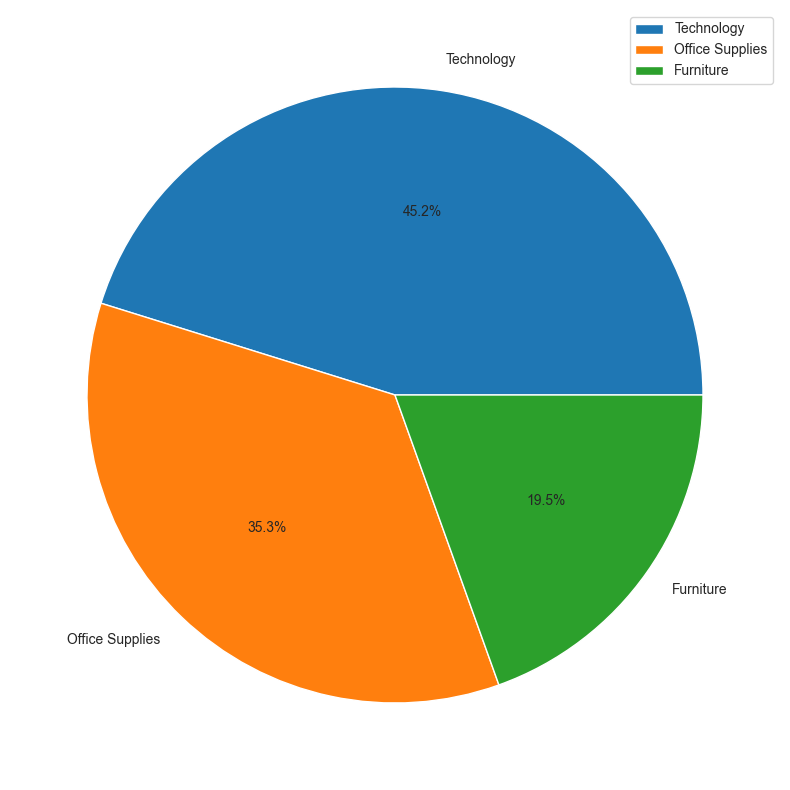

In [65]:
plt.figure(figsize=(10,10))
plt.pie(Q5['profit'],labels=Q5['category'],autopct = '%1.1f%%')
plt.legend()

Question 6 : Total sales values by category and subcategory ?

In [66]:
Q6 = df.groupby(['category','sub_category']).agg({'sales':'sum'}).reset_index()
Q6

,category,sub_category,sales
0,Furniture,Bookcases,1.466572e+06
1,Furniture,Chairs,1.501682e+06
2,Furniture,Furnishings,3.855783e+05
3,Furniture,Tables,7.570419e+05
4,Office Supplies,Appliances,1.011064e+06
5,Office Supplies,Art,3.720920e+05
6,Office Supplies,Binders,4.619115e+05
7,Office Supplies,Envelopes,1.709043e+05
8,Office Supplies,Fasteners,8.324232e+04
9,Office Supplies,Labels,7.340403e+04


In [67]:
x ,y= list(Q6['sub_category']), Q6['sales'].values
print(x)
print(y)


['Bookcases', 'Chairs', 'Furnishings', 'Tables', 'Appliances', 'Art', 'Binders', 'Envelopes', 'Fasteners', 'Labels', 'Paper', 'Storage', 'Supplies', 'Accessories', 'Copiers', 'Machines', 'Phones']
[1466572.2418  1501681.7642   385578.2559   757041.9244  1011064.305
  372091.9659   461911.5057   170904.3016    83242.3159    73404.03
  244291.7194  1127085.8614   243074.2206   749237.0185  1509436.27328
  779060.0671  1706824.1392 ]


Text(0.5, 1.0, 'Total sales by subcategory')

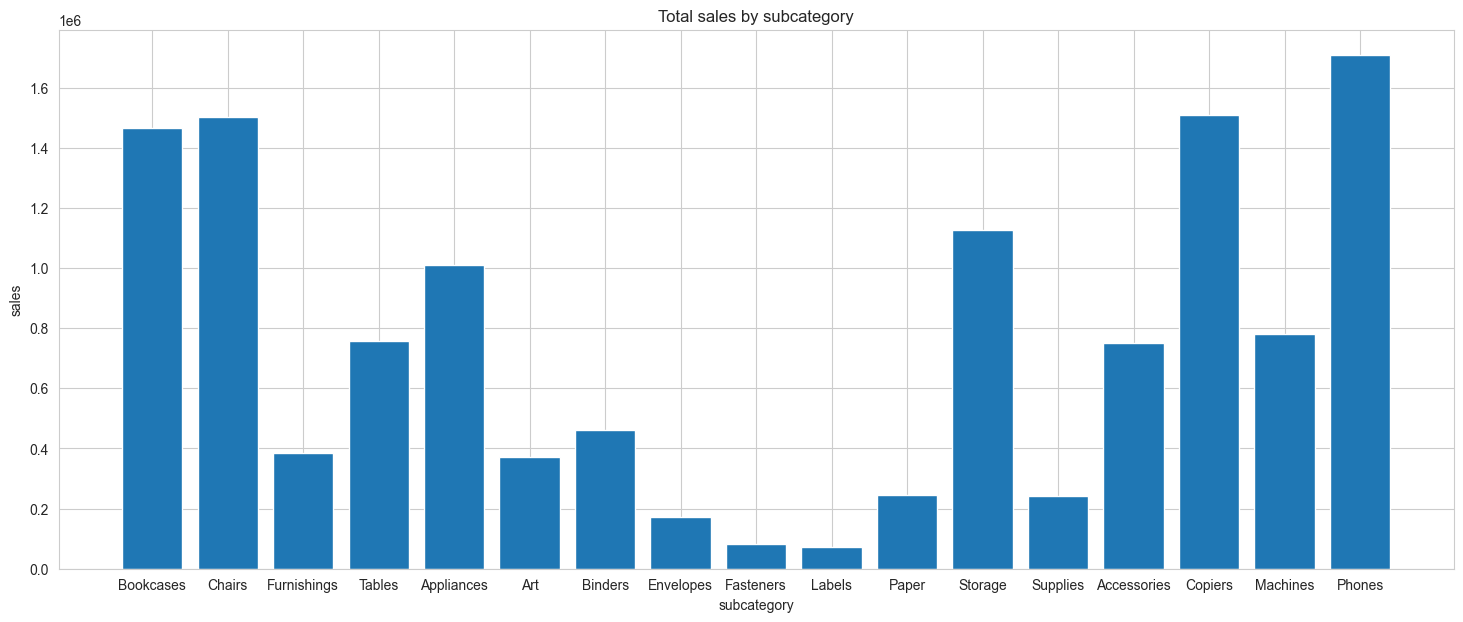

In [68]:
plt.figure(figsize=(18,7))
plt.bar(x,y)
#plt.xticks(rotation = 'vertical')
plt.ylabel("sales")
plt.xlabel("subcategory")
plt.title("Total sales by subcategory")

Question 7 : Which are the most selling products in subcategory ?

In [69]:
Q7 = df.groupby('sub_category').agg({'quantity':'sum'}).sort_values('quantity',ascending=False).reset_index()
Q7

,sub_category,quantity
0,Binders,21429
1,Storage,16917
2,Art,16301
3,Paper,12822
4,Chairs,12336
5,Phones,11870
6,Furnishings,11225
7,Accessories,10946
8,Labels,9322
9,Supplies,8543


In [70]:
x, y = list(Q7['sub_category']), Q7['quantity'].values
print(x)
print(y)

['Binders', 'Storage', 'Art', 'Paper', 'Chairs', 'Phones', 'Furnishings', 'Accessories', 'Labels', 'Supplies', 'Fasteners', 'Envelopes', 'Bookcases', 'Copiers', 'Appliances', 'Machines', 'Tables']
[21429 16917 16301 12822 12336 11870 11225 10946  9322  8543  8390  8380
  8310  7454  6078  4906  3083]


Text(0.5, 1.0, 'Which are the most selling products in subcategory?')

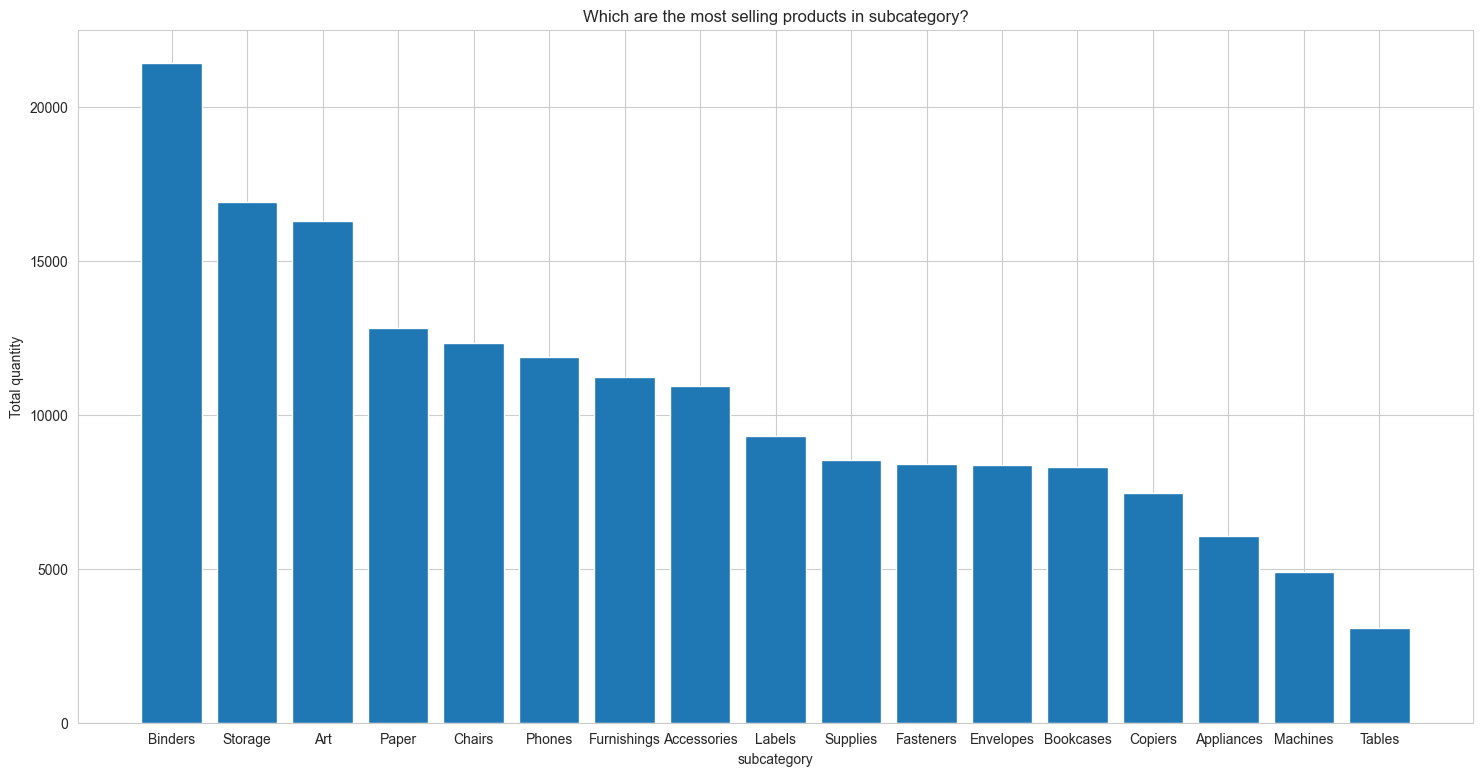

In [71]:
plt.figure(figsize=(18,9))
plt.bar(x,y)
plt.ylabel("Total quantity")
plt.xlabel("subcategory")
plt.title("Which are the most selling products in subcategory?")

Question 8 : Which customer segment are the most profitable ?

In [72]:
Q8 = df.groupby('segment').agg({'profit':'sum'}).sort_values('profit',ascending=False).reset_index()
Q8

,segment,profit
0,Consumer,749239.78206
1,Corporate,442785.85866
2,Home Office,277009.18056


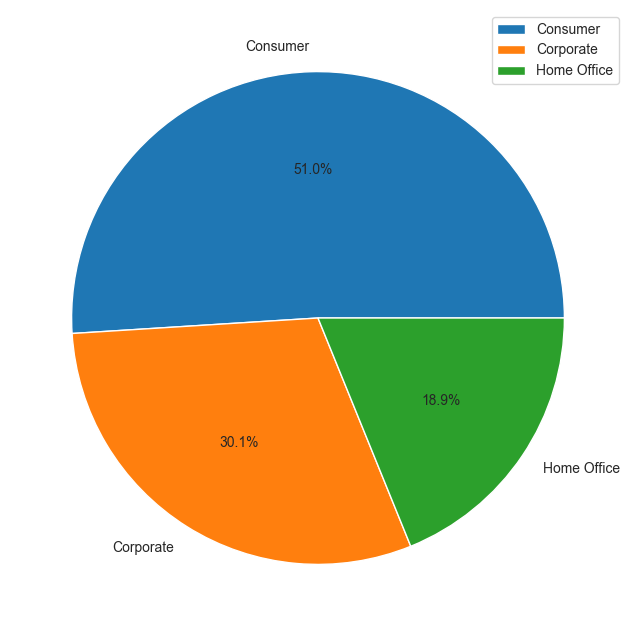

In [73]:
plt.figure(figsize=(10,8))
plt.pie(Q8['profit'],labels=Q8['segment'],autopct = '%1.1f%%')
plt.legend()

Question 9 : What shipping modes sold the most products?

In [74]:
Q9 = df.groupby('ship_mode').agg({'quantity':'sum'}).sort_values('quantity',ascending=False).reset_index()
Q9

,ship_mode,quantity
0,Standard Class,107319
1,Second Class,35724
2,First Class,26039
3,Same Day,9230


In [75]:
x, y = list(Q9['ship_mode']), Q9['quantity'].values
print(x)
print(y)

['Standard Class', 'Second Class', 'First Class', 'Same Day']
[107319  35724  26039   9230]


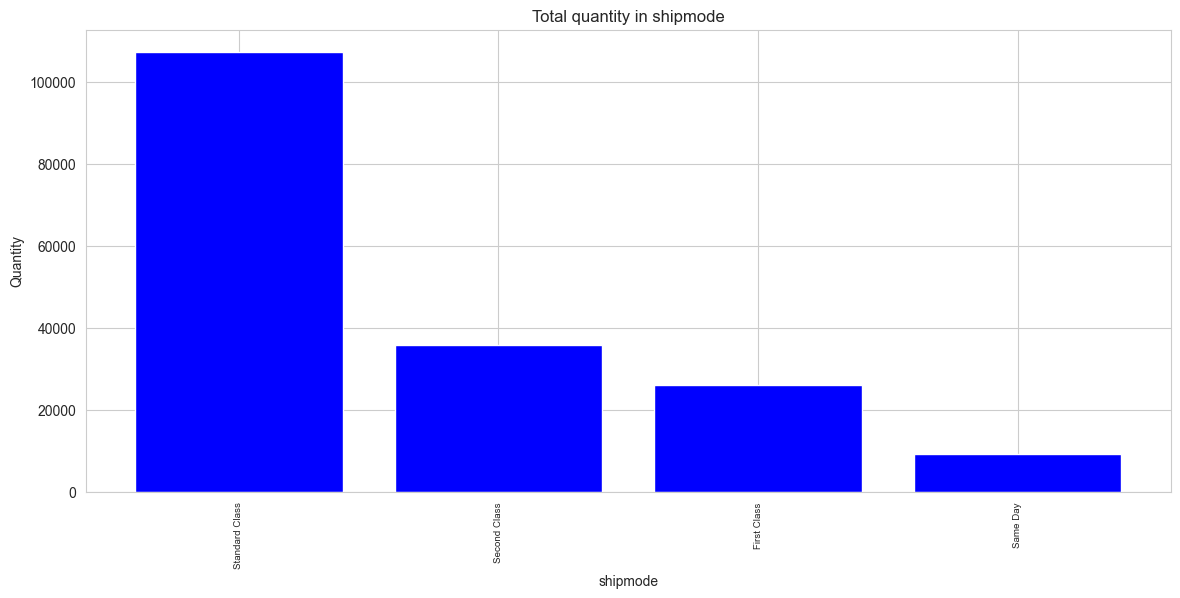

In [76]:
plt.figure(figsize=(14, 6))
plt.bar(x,y,color = 'b')
plt.xticks(rotation='vertical', size=7)
plt.xlabel("shipmode")
plt.ylabel("Quantity")
plt.title("Total quantity in shipmode")
plt.show()

Question 10 : Visualize the 'Category' column from the Shipmode column dataset standpoints.

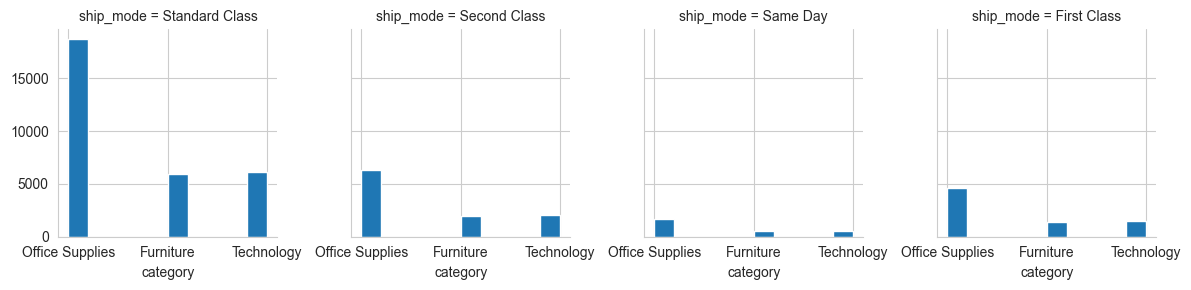

In [77]:
Q10 = sns.FacetGrid(df,col= 'ship_mode',palette='rainbow')
Q10.map(plt.hist,'category')

Question 11 : What market sold the most products?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14368\2818431991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x = 'market',palette='rainbow');


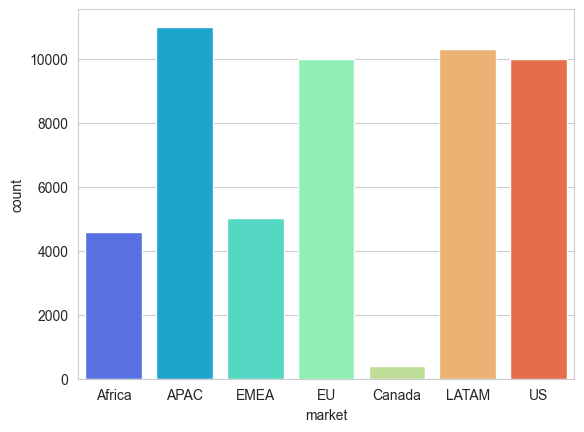

In [78]:
#Q11
sns.set_style('whitegrid');
sns.countplot(df,x = 'market',palette='rainbow');

question 12 : Which are the Top 10 country by sales?

In [79]:
Q12 = df.groupby('country').agg({'sales':'sum'}).sort_values('sales',ascending=False).reset_index()[:10]
Q12

,country,sales
0,United States,2.297201e+06
1,Australia,9.252359e+05
2,France,8.589311e+05
3,China,7.005620e+05
4,Germany,6.288400e+05
5,Mexico,6.225906e+05
6,India,5.896501e+05
7,United Kingdom,5.285763e+05
8,Indonesia,4.048875e+05
9,Brazil,3.611064e+05


<BarContainer object of 10 artists>

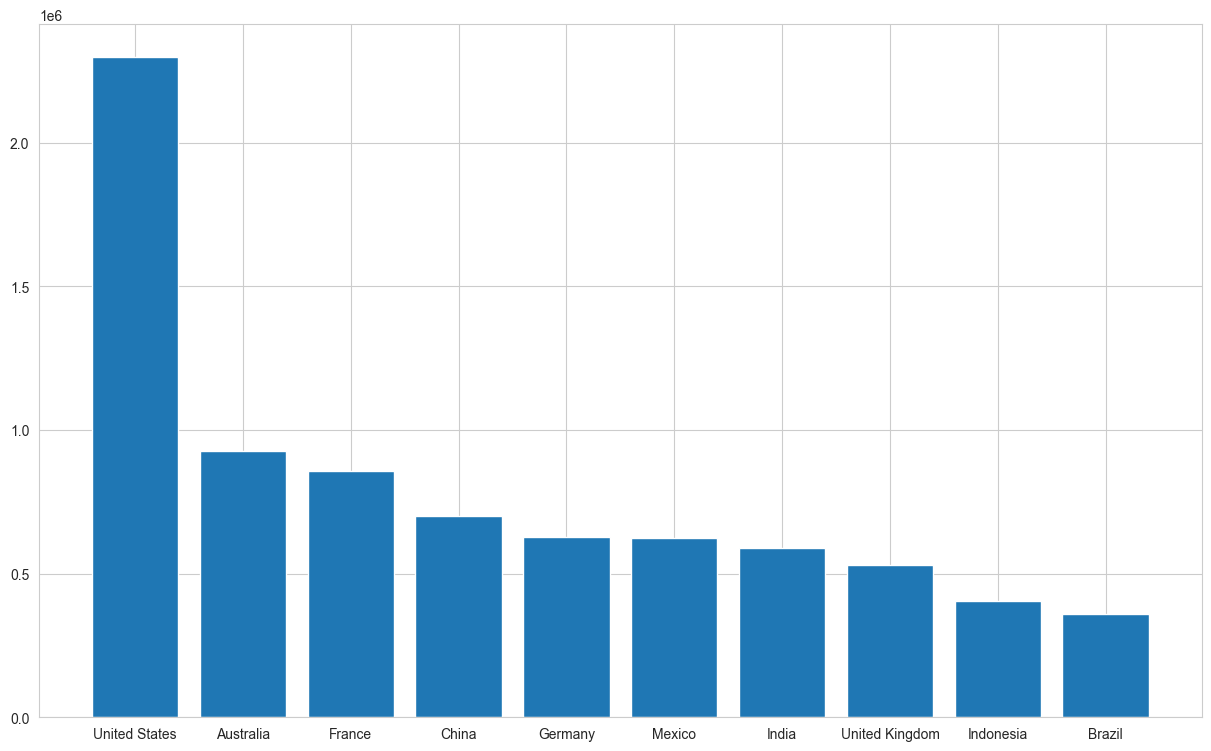

In [80]:
plt.figure(figsize=(15,9))
plt.bar(list(Q12['country']),list(Q12['sales'].values))

question 13 : Create a pie chart with the 10 countries that have the most sales

Text(0.5, 1.0, 'Top 10 country by Sales')

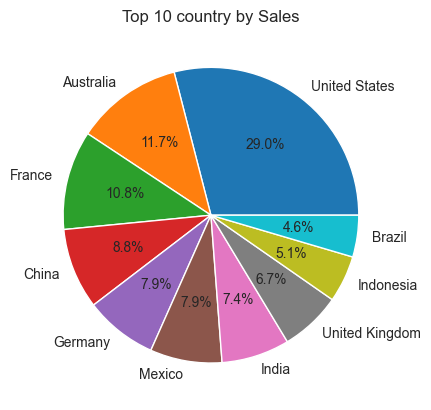

In [81]:
#q13
plt.pie(Q12['sales'],labels=Q12['country'],autopct = '%1.1f%%')
plt.title("Top 10 country by Sales")


Question 14 : Which are the average shipping cost for top 10 different countries?

In [82]:
Q14 = df.groupby('country').agg({'shipping_cost':'mean'}).sort_values('shipping_cost',ascending=False).reset_index()[:10]
Q14

,country,shipping_cost
0,Taiwan,155.660714
1,Chad,148.970000
2,Lesotho,135.650000
3,Montenegro,93.937500
4,Slovenia,61.220000
5,Republic of the Congo,59.303333
6,Central African Republic,57.625714
7,Namibia,50.370000
8,Bangladesh,46.402883
9,Estonia,46.070000


Question 15 : Who are the top-10 most profitable customers?

In [83]:
Q15 = df.groupby('customer_name').agg({'profit':'sum'}).sort_values('profit',ascending=False).reset_index()[:10]
Q15

,customer_name,profit
0,Tamara Chand,8672.89890
1,Raymond Buch,8453.04950
2,Sanjit Chand,8205.37990
3,Hunter Lopez,7816.56778
4,Bill Eplett,7410.00530
5,Harry Marie,6958.28640
6,Susan Pistek,6484.40726
7,Mike Gockenbach,6458.67620
8,Adrian Barton,6417.28450
9,Tom Ashbrook,6311.97910


Add a new column (month)

In [84]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month

Question 16 : Total sales values by year and month

In [85]:
Q16 = df.groupby(['year','month']).agg({'sales':'sum'})
Q16

sales
year month              
2011 1       98898.48886
     2       91152.15698
     3      145729.36736
     4      116915.76418
     5      146747.83610
     6      215207.38022
     7      115510.41912
     8      207581.49122
     9      290214.45534
     10     199071.26404
     11     298496.53752
     12     333925.73460
2012 1      135780.72024
     2      100510.21698
     3      163076.77116
     4      161052.26952
     5      208364.89124
     6      256175.69842
     7      145236.78512
     8      303142.94238
     9      289389.16564
     10     252939.85020
     11     323512.41690
     12     338256.96660
2013 1      199185.90738
     2      167239.65040
     3      198594.03012
     4      177821.31684
     5      260498.56470
     6      396519.61190
     7      229928.95200
     8      326488.78936
     9      376619.24568
     10     293406.64288
     11     373989.36010
     12     405454.37802
2014 1      241268.55566
     2      184837.35556
     3      263100.77262
     4      242771.86130
     5      288401.04614
     6      401814.06310
     7      258705.68048
     8      456619.94236
     9      481157.24370
     10     422766.62916
     11     555279.02700
     12     503143.69348

Question 17 :  Total sales chart by the year

In [86]:
Q17 = df.groupby('year').agg({'sales':'sum'}).sort_values('sales',ascending= False).reset_index()
Q17

,year,sales
0,2014,4.299866e+06
1,2013,3.405746e+06
2,2012,2.677439e+06
3,2011,2.259451e+06


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14368\1204165515.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'year', y = 'sales', data= Q17,palette='rainbow');


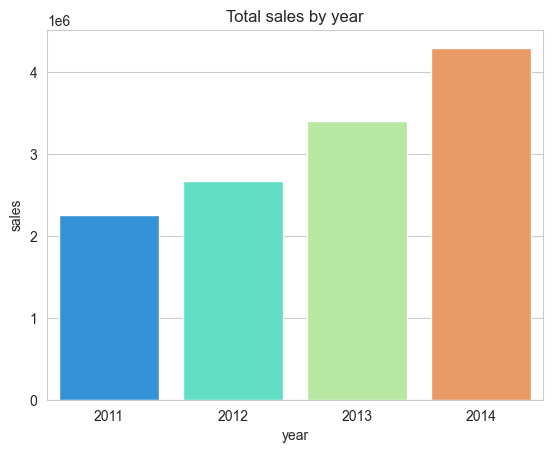

In [87]:
sns.barplot(x = 'year', y = 'sales', data= Q17,palette='rainbow');
plt.title("Total sales by year");
